In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
gem_data = pd.read_csv(r'cubic_zirconia.csv')

In [3]:
df_1 = gem_data.copy()
df_1.drop(columns='Unnamed: 0', inplace=True)
df_1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
print('No. of Columns', df_1.shape[1])
print('No. of Rows', df_1.shape[0])

No. of Columns 10
No. of Rows 26967


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [6]:
df_1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


In [7]:
check_null = df_1.isnull().sum().any()
if check_null == True:
    print('Dataset has', df_1.isnull().sum().sum(), 'Null values\n')
    print(df_1.isnull().sum())
else:
    print('There are no Null values in the dataset')

Dataset has 697 Null values

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64


In [8]:
check_dups = df_1.duplicated().sum().any()
if check_dups == True:
    print('Dataset has', df_1.duplicated().sum(), 'Duplicate rows\n')
#     print(df_1[df_1.duplicated()], '\n')
    df_1.drop_duplicates(inplace=True)
    print('Dropping all Duplicates from the dataset\nDuplicate count =', df_1.duplicated().sum())
else:
    print('There are no Duplicates in the dataset')

Dataset has 34 Duplicate rows

Dropping all Duplicates from the dataset
Duplicate count = 0


In [9]:
cat = []
nums = []

for i in df_1.columns:
    if df_1[i].dtype == 'object':
        cat.append(i)
    else:
        nums.append(i)
        
df_1_cat = df_1[cat]
df_1_nums = df_1[nums]

In [10]:
df_1_cat

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


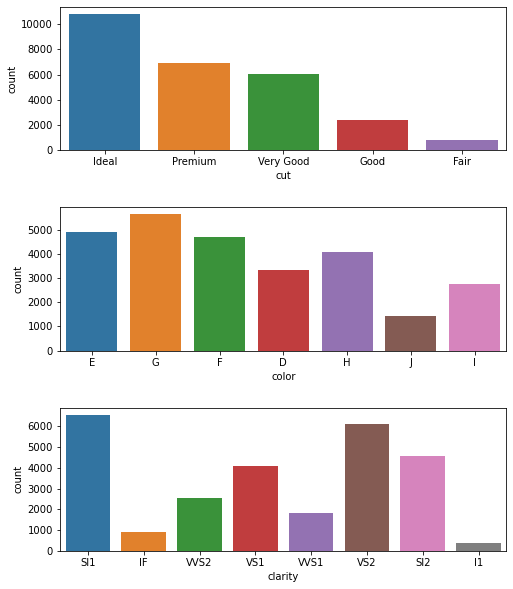

In [11]:
fig, axes = plt.subplots(nrows=len(df_1_cat.columns), ncols=1, figsize=(8,10))
for i in range(0, len(df_1_cat.columns)):
    sns.countplot(df_1_cat[df_1_cat.columns[i]], label=df_1_cat.columns[i], ax=axes[i])

plt.subplots_adjust(hspace=0.4)

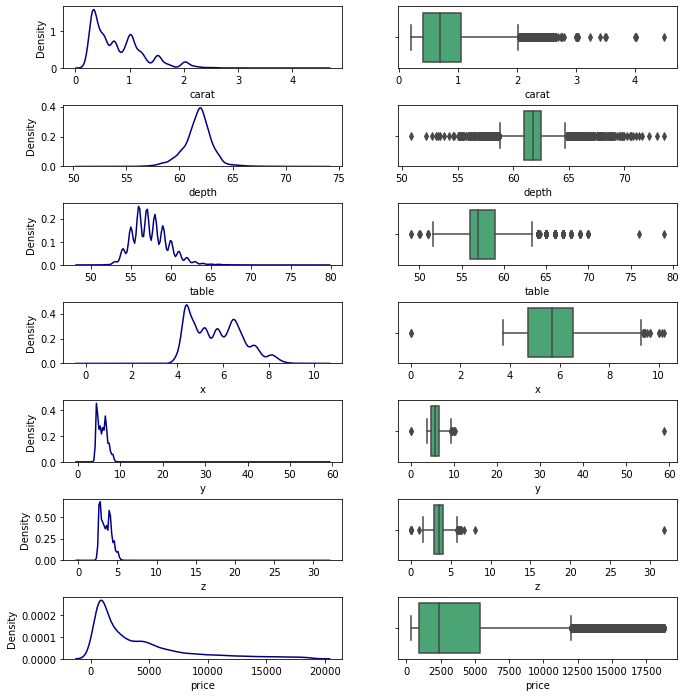

In [12]:
fig, axes = plt.subplots(nrows=len(df_1_nums.columns), ncols=2, figsize=(11,12))
for i in range(0, len(df_1_nums.columns)):
    sns.kdeplot(df_1_nums[df_1_nums.columns[i]], label=df_1_nums.columns[i], ax=axes[i][0], color='navy')
    sns.boxplot(df_1_nums[df_1_nums.columns[i]], ax=axes[i][1], color='mediumseagreen')

plt.subplots_adjust(hspace=0.6)

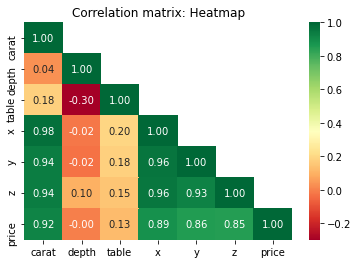

In [13]:
sns.heatmap(df_1.corr(), cmap='RdYlGn', fmt='.2f', annot=True, mask=np.triu(df_1.corr(),+1))
plt.title('Correlation matrix: Heatmap');

<Figure size 432x288 with 0 Axes>

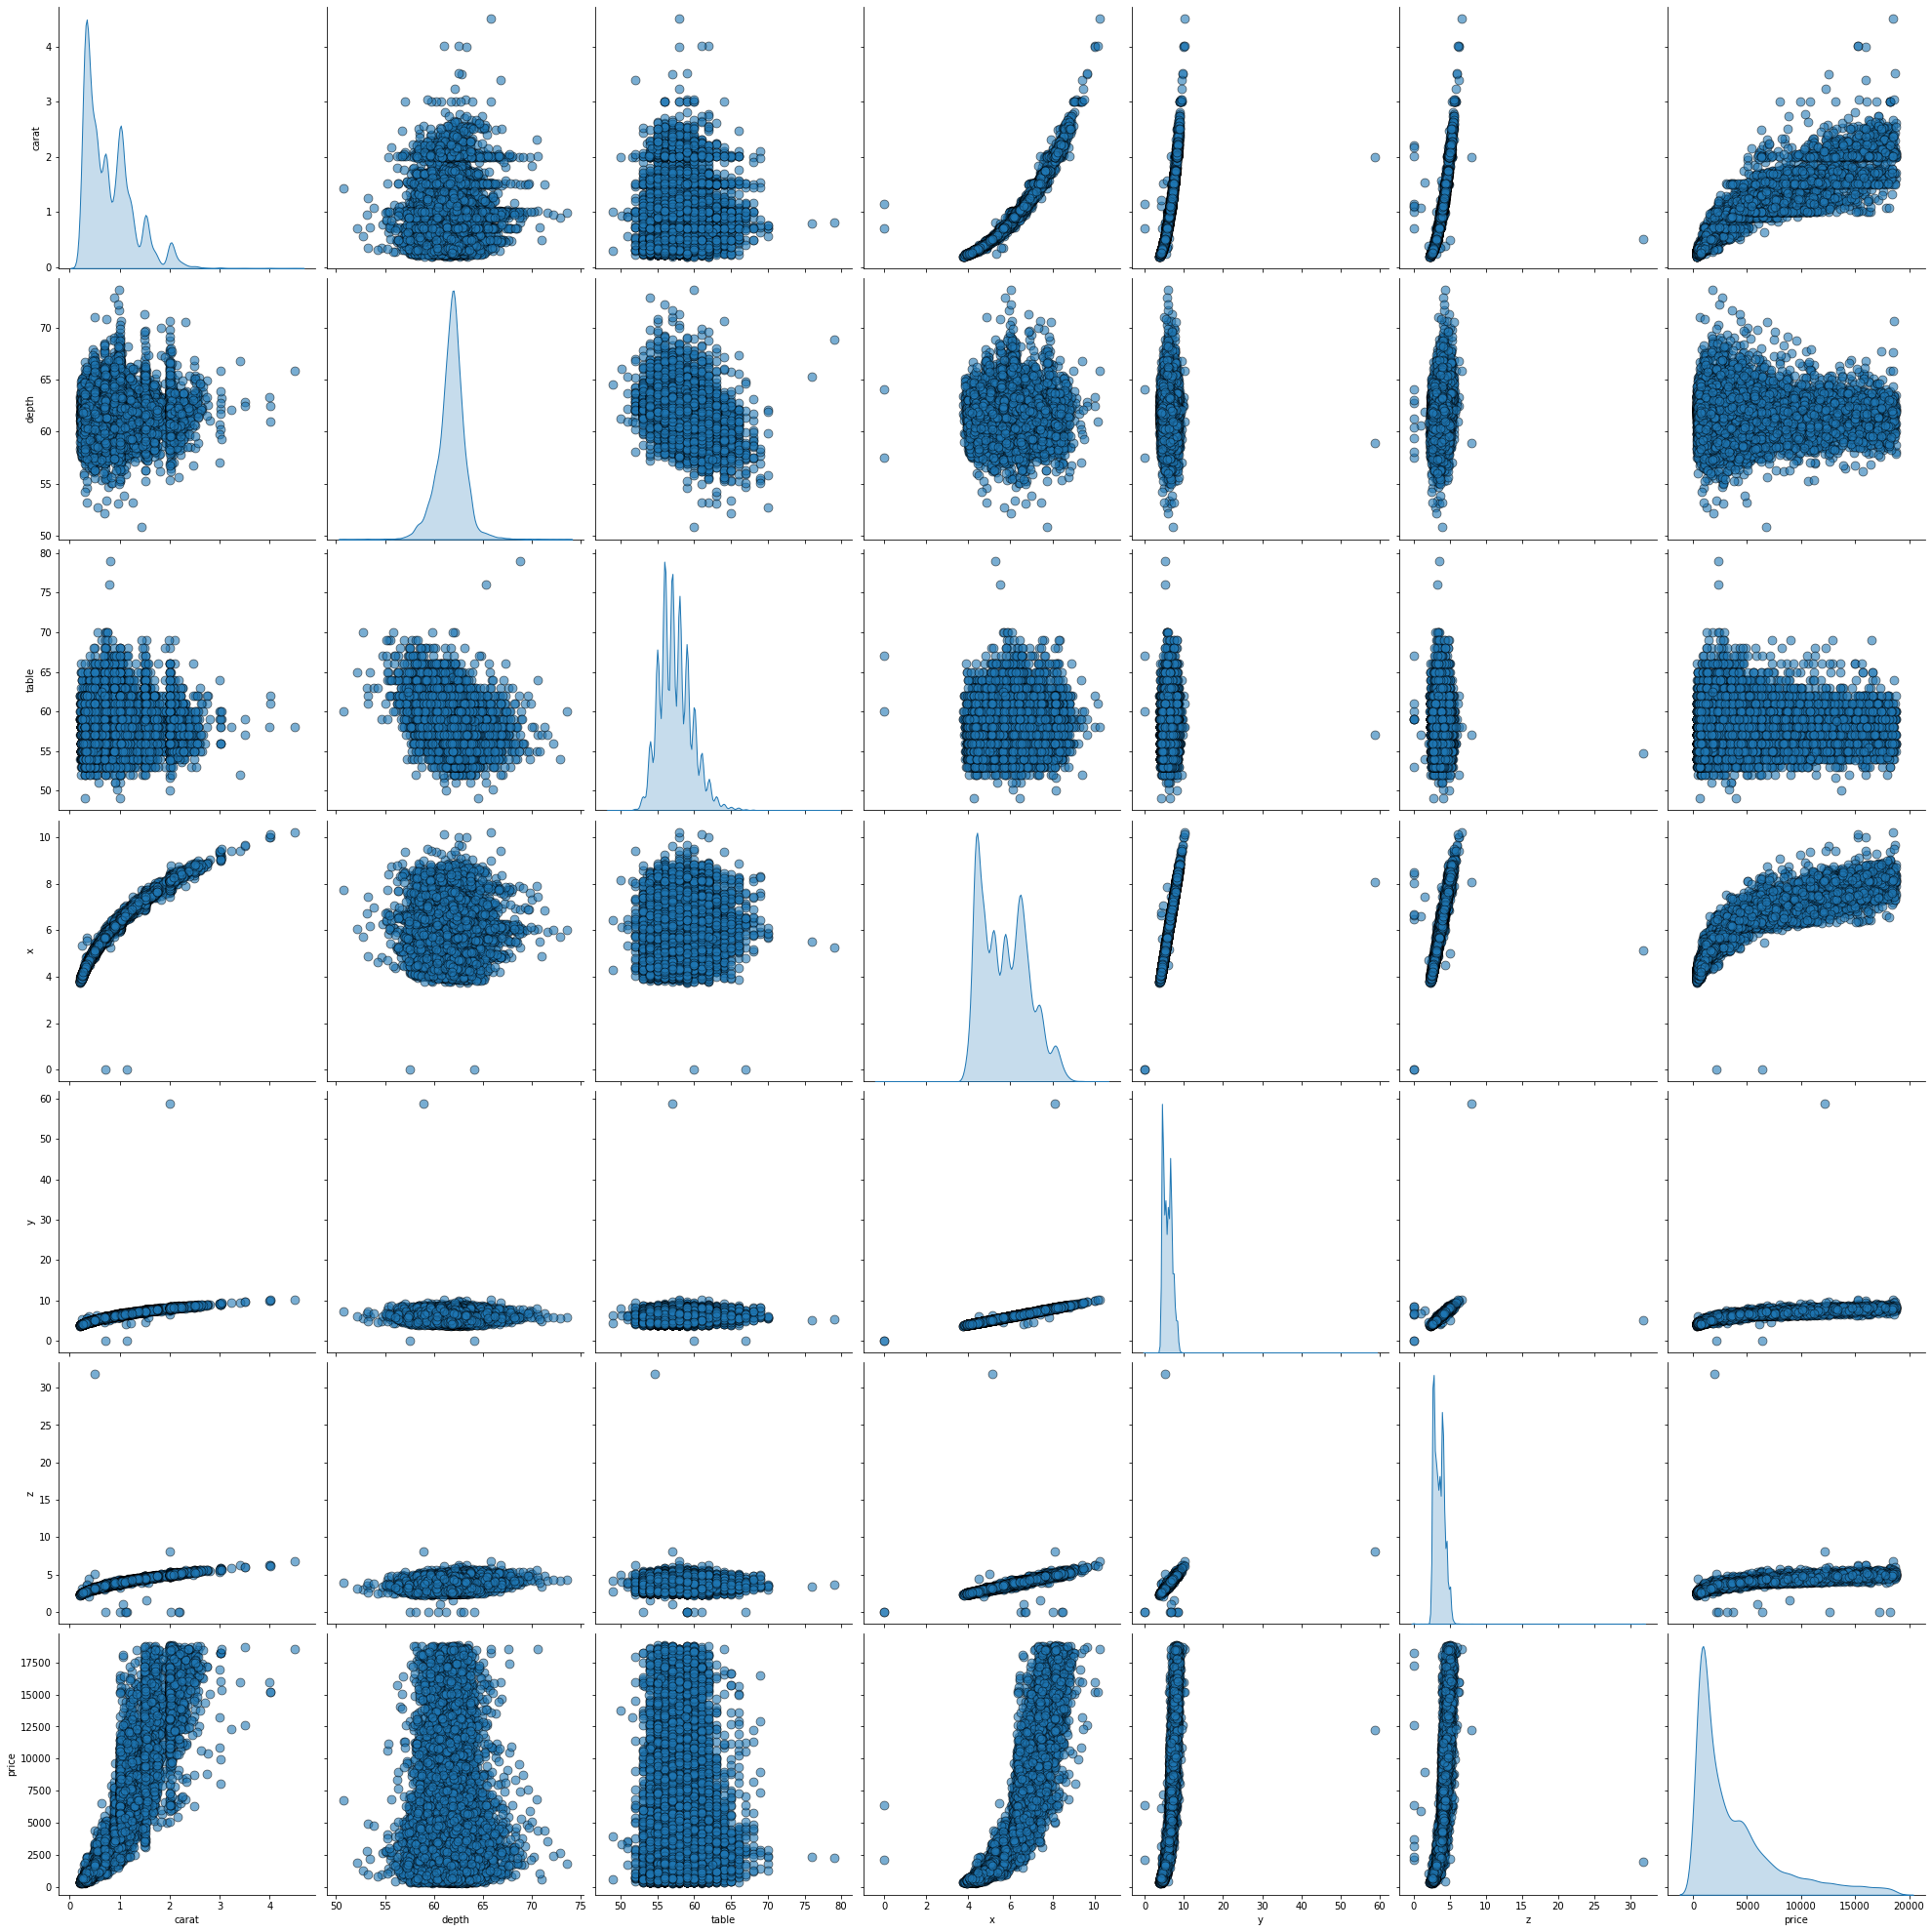

In [14]:
plt.suptitle('Pair Plot of ', size = 28);

sns.pairplot(
    df_1,
    diag_kind = 'kde',
    plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
    size = 4);

In [15]:
# Checking for hidden missing values

hidden = (df_1[df_1.columns] == 0).sum()
hidden

# Column x has 2 0s. Column x is the length of cubic zirconia in mm and hence it cannot be 0.
# Column y has 2 0s. Column y is the width of the cubic zirconia in mm and hence it also cannot be 0.
# Column z has 8 0s. Column z is the height of the cubic zirconia in mm and hence it too cannot be 0.

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          2
y          2
z          8
price      0
dtype: int64

In [16]:
df_1.replace(0, np.nan, inplace=True)

check_null = df_1.isnull().sum().any()
if check_null == True:
    print('Dataset has', df_1.isnull().sum().sum(), 'Null values\n')
    print(df_1.isnull().sum())
else:
    print('There are no Null values in the dataset')

Dataset has 709 Null values

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            2
y            2
z            8
price        0
dtype: int64


In [17]:
for column in df_1.columns:
    if df_1[column].dtype != 'object':
        median = df_1[column].median()
        df_1[column] = df_1[column].fillna(median)
        
print('Dataset has', df_1.isnull().sum().sum(), 'Null values\n')
df_1.isnull().sum()

Dataset has 0 Null values



carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

The dataset is not scaled but scaling in general is not necessary for linear regression. Scaling may be necessary if the model shows an absurd intercept value. Ideally intercepts should be 0, so any value that is not close to 0 will make no sense. In such cases scaling will reduce the intercept to very close to absolute 0. This will affect the coefficients of the variables and the bias will become 0, however both scaled and unscaled models will have the same accuracy scores.

In [18]:
# print(df_1['cut'].unique())
# print(df_1['color'].unique())
# print(df_1['clarity'].unique())

for column in df_1[['cut', 'color', 'clarity']]:
    print('Unique values in', column, 'column are', df_1[column].unique())

Unique values in cut column are ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
Unique values in color column are ['E' 'G' 'F' 'D' 'H' 'J' 'I']
Unique values in clarity column are ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


#### Cut:
    Describe the cut quality of the cubic zirconia.
    Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
        Fair = 0
        Good = 1
        Very Good = 2
        Premium = 3
        Ideal = 4

In [19]:
df_1['cut'] = np.where(df_1['cut']=='Fair', '0', df_1['cut'])
df_1['cut'] = np.where(df_1['cut']=='Good', '1', df_1['cut'])
df_1['cut'] = np.where(df_1['cut']=='Very Good', '2', df_1['cut'])
df_1['cut'] = np.where(df_1['cut']=='Premium', '3', df_1['cut'])
df_1['cut'] = np.where(df_1['cut']=='Ideal', '4', df_1['cut'])

#### Color:
    Colour of the cubic zirconia.With D being the best and J the worst.
    Also clubbing D, E, F in the same level as the color for all three is very Clear
    and G, H, I, J in another level as the color for them is a pale Yellow
        D = 1.3
        E = 1.2
        F = 1.1
        G = 0.4
        H = 0.3
        I = 0.2
        J = 0.1

In [20]:
df_1['color'] = np.where(df_1['color']=='D', '1.3', df_1['color'])
df_1['color'] = np.where(df_1['color']=='E', '1.2', df_1['color'])
df_1['color'] = np.where(df_1['color']=='F', '1.1', df_1['color'])
df_1['color'] = np.where(df_1['color']=='G', '0.4', df_1['color'])
df_1['color'] = np.where(df_1['color']=='H', '0.3', df_1['color'])
df_1['color'] = np.where(df_1['color']=='I', '0.2', df_1['color'])
df_1['color'] = np.where(df_1['color']=='J', '0.1', df_1['color'])

#### Clarity:
    Clarity refers to the absence of the Inclusions and Blemishes.
    (In order from Bestst to Worst in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
    
    As we know that the distance between the points in Ordinal Data, cannot be calculated and is NOT MEANINGFUL
    We can safely consider VVS1 and VVS2 at the same levels.
    Similarly we can merge other sublevels too, like VS1 with VS2, and also SI1 with SI2
    
        IF = 4
        VVS1 = 3
        VVS2 = 3
        VS1 = 2
        VS2 = 2
        SI1 = 1
        SI2 = 1
        I1 = 0

In [21]:
df_1['clarity'] = np.where(df_1['clarity']=='IF', '4', df_1['clarity'])
df_1['clarity'] = np.where(df_1['clarity']=='VVS1', '3', df_1['clarity'])
df_1['clarity'] = np.where(df_1['clarity']=='VVS2', '3', df_1['clarity'])
df_1['clarity'] = np.where(df_1['clarity']=='VS1', '2', df_1['clarity'])
df_1['clarity'] = np.where(df_1['clarity']=='VS2', '2', df_1['clarity'])
df_1['clarity'] = np.where(df_1['clarity']=='SI1', '1', df_1['clarity'])
df_1['clarity'] = np.where(df_1['clarity']=='SI2', '1', df_1['clarity'])
df_1['clarity'] = np.where(df_1['clarity']=='I1', '0', df_1['clarity'])

In [22]:
for column in df_1[['cut', 'color', 'clarity']]:
    print('Unique values in', column, 'column are', df_1[column].unique())

Unique values in cut column are ['4' '3' '2' '1' '0']
Unique values in color column are ['1' '3' '2' '0' '4' '6' '5']
Unique values in clarity column are ['3' '0' '1' '2' '4']


In [23]:
df_1.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [24]:
df_1['cut'] = pd.to_numeric(df_1['cut']).astype(np.float64)
df_1['color'] = pd.to_numeric(df_1['color']).astype(np.float64)
df_1['clarity'] = pd.to_numeric(df_1['clarity']).astype(np.float64)

In [25]:
df_1.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

### Outlier Treatment

<AxesSubplot:>

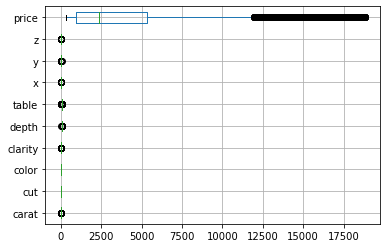

In [26]:
df_1.boxplot(vert=0)

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [28]:
for i in range(0, len(df_1.columns)):
    lr,ur = remove_outlier(df_1[df_1.columns[i]])
    df_1[df_1.columns[i]] = np.where(df_1[df_1.columns[i]]>ur,ur,df_1[df_1.columns[i]])
    df_1[df_1.columns[i]] = np.where(df_1[df_1.columns[i]]<lr,lr,df_1[df_1.columns[i]])

<AxesSubplot:>

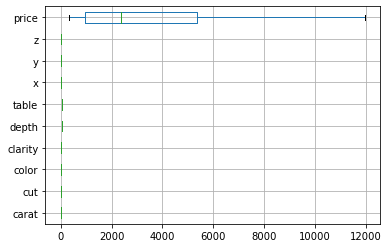

In [29]:
df_1.boxplot(vert=0)

In [30]:
X = df_1.drop('price', axis=1)
y = df_1[['price']]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,1.0,3.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,0.5,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,1.0,1.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,2.0,2.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,2.0,1.0,60.4,59.0,4.35,4.43,2.65


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [32]:
# Checking dimensions on the train and test data

print('X_train :: Columns = {}, Rows = {}'.format(X_train.shape[1], X_train.shape[0]))
print('X_test :: Columns = {}, Rows = {}'.format(X_test.shape[1], X_test.shape[0]))
print('Y_train :: Columns = {}, Rows = {}'.format(y_train.shape[1], y_train.shape[0]))
print('Y_test :: Columns = {}, Rows = {}'.format(y_test.shape[1], y_test.shape[0]))

X_train :: Columns = 9, Rows = 18853
X_test :: Columns = 9, Rows = 8080
Y_train :: Columns = 1, Rows = 18853
Y_test :: Columns = 1, Rows = 8080


In [33]:
# invoke the LinearRegression function and find the bestfit model on training data

from sklearn.linear_model import LinearRegression
from sklearn import metrics

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [34]:
regression_model.coef_

array([[ 8850.45731376,   108.95215033,  -266.9070636 ,  -851.71583094,
           25.70241317,   -15.33876418, -1347.94550393,  1481.98896973,
         -858.61669529]])

In [35]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8850.457313758576
The coefficient for cut is 108.9521503323625
The coefficient for color is -266.9070635958388
The coefficient for clarity is -851.7158309410286
The coefficient for depth is 25.702413170790514
The coefficient for table is -15.338764182359112
The coefficient for x is -1347.945503933495
The coefficient for y is 1481.98896972769
The coefficient for z is -858.6166952853117


In [36]:
regression_model.intercept_

array([555.78739337])

In [37]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 555.7873933721603


In [38]:
# R square on training data
regression_model.score(X_train, y_train)

0.9283822240536124

In [39]:
# R square on training data
regression_model.score(X_test, y_test)

0.9294878689119586

In [40]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

927.4556959898108

In [41]:
#RMSE on Testing data

predicted_test = regression_model.fit(X_train, y_train).predict(X_test)
rmse_test = np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
rmse_test

922.4871302055708

In [42]:
df_1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,1.0,3.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,0.5,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,1.0,1.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,2.0,2.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,2.0,1.0,60.4,59.0,4.35,4.43,2.65,779.0


In [43]:
#model accuracy

1-((rmse_test)/(df_1['price'].mean()))

0.7530705134644899

In [44]:
# concatenate X and y into a single dataframe

df_1_train = pd.concat([X_train, y_train], axis=1)
df_1_test = pd.concat([X_test,y_test], axis=1)
df_1_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,2.0,4.0,2.0,62.4,60.0,4.41,4.44,2.76,537.0
2275,0.30,4.0,1.0,2.0,61.2,55.0,4.35,4.31,2.65,844.0
19183,0.50,4.0,3.0,3.0,62.5,57.0,5.09,5.05,3.17,1240.0
5030,1.10,1.0,1.0,3.0,63.3,56.0,6.53,6.58,4.15,4065.0
25414,1.02,3.0,2.0,3.0,61.1,62.0,6.54,6.49,3.98,4057.0


In [45]:
expr = 'price ~ carat + cut + color + clarity + depth + table + x + y + z'

# including the variables with spaces
# singularity matrix error - if you have correlated variables

In [46]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula=expr, data=df_1_train).fit()
lm1.params

Intercept     555.787393
carat        8850.457314
cut           108.952150
color        -266.907064
clarity      -851.715831
depth          25.702413
table         -15.338764
x           -1347.945504
y            1481.988970
z            -858.616695
dtype: float64

In [47]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.714e+04
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:52:35   Log-Likelihood:            -1.5556e+05
No. Observations:               18853   AIC:                         3.111e+05
Df Residuals:                   18843   BIC:                         3.112e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    555.7874    810.534      0.686      0.4

In [48]:
# Calculate MSE
mse = np.mean((lm1.predict(df_1_train.drop('price',axis=1))-df_1_train['price'])**2)

#Root Mean Squared Error - RMSE
np.sqrt(mse)

927.4556959898102

In [49]:
np.sqrt(lm1.mse_resid) #another way

927.7017642056471

In [50]:
# Prediction on Test data
y_pred = lm1.predict(df_1_test)

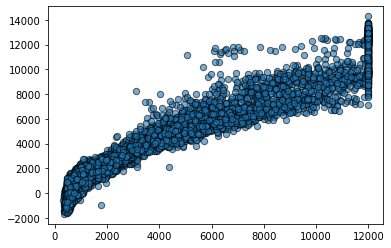

In [51]:
plt.scatter(y_test['price'], y_pred, alpha=0.6, s=40, edgecolor='k')
plt.show()

In [52]:
for i,j in np.array(lm1.params.reset_index()):
    print('({})*{} +'.format(round(j, 2), i), end=' ')

(555.79)*Intercept + (8850.46)*carat + (108.95)*cut + (-266.91)*color + (-851.72)*clarity + (25.7)*depth + (-15.34)*table + (-1347.95)*x + (1481.99)*y + (-858.62)*z + 